<a href="https://colab.research.google.com/github/rohitpaul09/Play-Store-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Application Trend Explorer: Decoding Play Store Patterns**



# **Project Summary -**

This study analyzes Google Play Store app data using Python to identify key factors driving app success. Using tools like NumPy, Pandas, and Seaborn, two datasets—Play Store (10,841 rows) and User Reviews (64,295 rows)—were cleaned to address duplicates and missing values. Exploratory Data Analysis (EDA) uncovered insights into user sentiment, ratings, genre preferences, and the impact of updates.   

Key recommendations for app developers include prioritizing free apps, optimizing app size and content, improving compatibility, boosting engagement, and addressing negative feedback. Continuous trend monitoring and feedback response are critical for success in the evolving Play Store landscape.

#### **Objective**

Analyze the Play Store apps dataset using Python, uncovering key factors for app engagement and success, and provide valuable insights to optimize app performance in the Android market.

## ***1.Data***

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [6]:
# Load Dataset
df_psdata = pd.read_csv('E:\project\Play Store DA\Play-Store-App-Review-Analysis\googleplaystore.csv')
df_review=pd.read_csv('E:\project\Play Store DA\Play-Store-App-Review-Analysis\googleplaystore_user_reviews.csv')


In [7]:
# Display the Play Store App data
print('Play Store Data Overview:')
df_psdata.head()


Play Store Data Overview:


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
# Display the User Reviews data
print('User Reviews Data Overview:')
df_review.head()


User Reviews Data Overview:


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
print('Play Store Data Rows count:',df_psdata.shape[0])
print('Play Store Data Columns count:',df_psdata.shape[1])
print('User Reviews Data Rows count:',df_review.shape[0])
print('User Reviews Data Columns count:',df_review.shape[1])


Play Store Data Rows count: 10841
Play Store Data Columns count: 13
User Reviews Data Rows count: 64295
User Reviews Data Columns count: 5


### Dataset Information

In [9]:
# Dataset Info
print('Play Store Data Info:')
df_psdata.info()
print('\n')
print('User Reviews Data Info:')
df_review.info()


Play Store Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


User Reviews Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Co

#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
print('Play Store Data Duplicate Value Count:',len(df_psdata[df_psdata.duplicated()]))
print('User Reviews Data Duplicate Value Count:',len(df_review[df_review.duplicated()]))


Play Store Data Duplicate Value Count: 483
User Reviews Data Duplicate Value Count: 33616


#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
# Function to calculate the percentage of null values in each column
def null_percent(data_fm):
    null_info = pd.DataFrame(index=data_fm.columns)
    null_info["datatype"] = data_fm.dtypes
    null_info["not null values"] = data_fm.count()
    null_info["null value"] = data_fm.isnull().sum()
    null_info["null value(%)"] = round(data_fm.isnull().mean() * 100, 2)
    return null_info

# Display the percentage of null values for Play Store Data
print('Null value % in Play Store Data:', null_percent(df_psdata), sep='\n')
print('\n')
# Display the percentage of null values for User Reviews Data
print('Null value % in User Reviews Data:', null_percent(df_review), sep='\n')


Null value % in Play Store Data:
               datatype  not null values  null value  null value(%)
App              object            10841           0           0.00
Category         object            10841           0           0.00
Rating          float64             9367        1474          13.60
Reviews          object            10841           0           0.00
Size             object            10841           0           0.00
Installs         object            10841           0           0.00
Type             object            10840           1           0.01
Price            object            10841           0           0.00
Content Rating   object            10840           1           0.01
Genres           object            10841           0           0.00
Last Updated     object            10841           0           0.00
Current Ver      object            10833           8           0.07
Android Ver      object            10838           3           0.03


Null value % 

Null Value Heatmap for Play Store Data


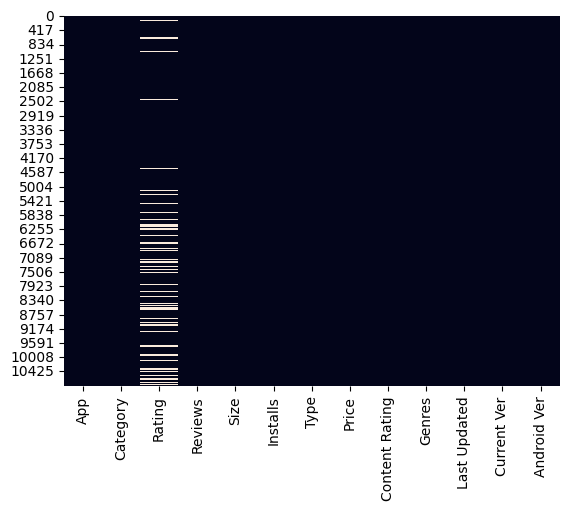

In [10]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap for Play Store Data
print('Null Value Heatmap for Play Store Data')
sns.heatmap(df_psdata.isnull(), cbar=False)
plt.show()


Null Value Heatmap for User Reviews Data


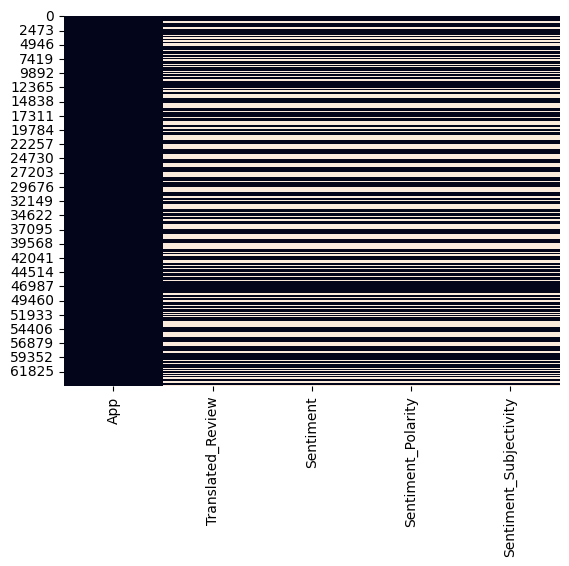

In [12]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap for User Reviews Data
print('Null Value Heatmap for User Reviews Data')
sns.heatmap(df_review.isnull(), cbar=False)
plt.show()


### Dataset

- The datasets are associated with the mobile application industry, focusing on the Android platform.
- Play Store dataset: 10,841 rows, 13 columns, 483 instances of duplicated rows.
  - Missing values in columns: 'Rating' (13.60% null values), 'Type' (0.01% null values), 'Content Rating' (0.01% null values), 'Current Ver' (0.07% null values), 'Android Ver' (0.03% null values).
- User reviews dataset: 64,295 rows, 5 columns, 33,616 instances of duplicated rows.
  - Missing values in columns: 'Translated_Review' (41.79% null value), 'Sentiment' (41.78% null value), 'Sentiment_Polarity' (41.78% null values), 'Sentiment_Subjectivity' (41.78% null values).
- Primary aim: Uncover key factors contributing to app engagement and success in the Android market using this data.

## ***2.Variables***

In [13]:
# Dataset Columns
print('Play Store Dataset Columns:',df_psdata.columns,sep='\n',end='\n\n')
print('User Reviews Dataset Columns:',df_review.columns,sep='\n')


Play Store Dataset Columns:
Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

User Reviews Dataset Columns:
Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')


In [15]:
# Dataset Description
print('Play Store Dataset Description:',df_psdata.describe(include='all'),sep='\n',end='\n\n')
print('User Reviews Dataset Description:',df_review.describe(include='all'),sep='\n')


Play Store Dataset Description:
           App Category       Rating Reviews                Size    Installs  \
count    10841    10841  9367.000000   10841               10841       10841   
unique    9660       34          NaN    6002                 462          22   
top     ROBLOX   FAMILY          NaN       0  Varies with device  1,000,000+   
freq         9     1972          NaN     596                1695        1579   
mean       NaN      NaN     4.193338     NaN                 NaN         NaN   
std        NaN      NaN     0.537431     NaN                 NaN         NaN   
min        NaN      NaN     1.000000     NaN                 NaN         NaN   
25%        NaN      NaN     4.000000     NaN                 NaN         NaN   
50%        NaN      NaN     4.300000     NaN                 NaN         NaN   
75%        NaN      NaN     4.500000     NaN                 NaN         NaN   
max        NaN      NaN    19.000000     NaN                 NaN         NaN   

       

### Variables Description

###Descriptions for Play Store Dataset:

**App:** The application's name and a brief description.

**Category:** The app's assigned category.

**Rating:** The average user rating.

**Reviews:** The total number of user reviews.

**Size:** The space the app occupies on a mobile phone.

**Installs:** The overall installations or downloads.

**Type:** Indicates whether the app is free or paid.

**Price:** The installation cost. For free apps, the price is zero.

**Content Rating:** Specifies if the app is suitable for all age groups.

**Genres:** Various categories to which an app can belong.

**Last Updated:** The date of the app's last update.

**Current Ver:** The app's current version.

**Android Ver:** The Android version supporting the app.

###Descriptions for User Reviews Dataset:

**App:** The app's name with a brief description.

**Translated_Review:** English translation of the user's review.

**Sentiment:** The reviewer’s attitude categorized as 'Positive', 'Negative', or 'Neutral'.

**Sentiment_Polarity:** The review's polarity, ranging from -1 (Negative) to 1 (Positive).

**Sentiment_Subjectivity:** The score indicates the degree to which a reviewer’s opinion aligns with the general public’s opinion, with a range of [0, 1]. Higher scores suggest opinions closer to the general public, while lower scores indicate more factual information in the review

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
# Printing unique values for each variable in the Play Store Dataset
print('Unique Values for each variable in Play Store Dataset:', end='\n\n')

for i in df_psdata.columns.tolist():
    print("No. of unique values in ", i, "is ->", df_psdata[i].nunique())

print('\n')

# Printing unique values for each variable in the User Reviews Dataset
print('Unique Values for each variable in User Reviews Dataset:', end='\n\n')

for i in df_review.columns.tolist():
    print("No. of unique values in ", i, "is ->", df_review[i].nunique())


Unique Values for each variable in Play Store Dataset:

No. of unique values in  App is -> 9660
No. of unique values in  Category is -> 34
No. of unique values in  Rating is -> 40
No. of unique values in  Reviews is -> 6002
No. of unique values in  Size is -> 462
No. of unique values in  Installs is -> 22
No. of unique values in  Type is -> 3
No. of unique values in  Price is -> 93
No. of unique values in  Content Rating is -> 6
No. of unique values in  Genres is -> 120
No. of unique values in  Last Updated is -> 1378
No. of unique values in  Current Ver is -> 2832
No. of unique values in  Android Ver is -> 33


Unique Values for each variable in User Reviews Dataset:

No. of unique values in  App is -> 1074
No. of unique values in  Translated_Review is -> 27994
No. of unique values in  Sentiment is -> 3
No. of unique values in  Sentiment_Polarity is -> 5410
No. of unique values in  Sentiment_Subjectivity is -> 4474


## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
# Print the rows with non-numeric characters in the 'Reviews' column
non_numeric_reviews = df_psdata[df_psdata['Reviews'].str.contains(r'\D')]
print("Rows with non-numeric characters in 'Reviews' column:")
non_numeric_reviews


Rows with non-numeric characters in 'Reviews' column:


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [17]:
# The row at index 10472 contains data that is entirely incorrect or irrelevant.
# The row is deemed unusable or misleading for the analysis, and removing it ensures the integrity and accuracy of the overall dataset.
df_psdata = df_psdata.drop(index=10472)

# Resetting the index ensures that the DataFrame has continuous and ordered indices after dropping a row.
df_psdata = df_psdata.reset_index(drop=True)


In [18]:
# Convert the 'Reviews' column to integer datatype
df_psdata['Reviews'] = df_psdata['Reviews'].astype(int)


In [19]:
# Convert the 'Last Updated' column to datetime format
df_psdata['Last Updated'] = pd.to_datetime(df_psdata['Last Updated'])


In [20]:
# Creating a function drop_dollar, which drops the $ symbol if present and returns the value as a float.
def drop_dollar(value):

    if '$' in value:
        return float(value[1:])
    else:
        return float(value)

# Applying the drop_dollar function to the 'Price' column
df_psdata['Price'] = df_psdata['Price'].apply(lambda x: drop_dollar(x))


In [21]:
# Defining a function drop_plus that removes the '+' symbol if present and returns the result as an integer.

def drop_plus(value):
    '''
    This function drops the + symbol if present and returns the value with int datatype.
    If the value is not a valid integer, return 0.
    '''
    try:
        if '+' and ',' in value:
            return int(value[:-1].replace(',', ''))
        elif '+' in value:
            return int(value[:-1])
        else:
            return int(value)
    except ValueError:
        return 0
    '''
    The 'Installs' column now contains integer values representing the minimum number of times an app has been installed.
    An 'Installs' value of 0 means the app has not been installed.
    An 'Installs' value of 1 means the app has been installed at least once.
    An 'Installs' value of 1000000 means the app has been installed by at least one million users, and so on.
    '''
# The drop_plus function applied to the 'Installs' column
df_psdata['Installs'] = df_psdata['Installs'].apply(lambda x: drop_plus(x))


In [22]:
# Defining a function to convert all the entries in KB to MB and then converting them to float datatype.

def kb_to_mb(entry):
    '''
    Converts size entries to MB. Returns as a float if in megabytes (M), or converts and rounds to 4 decimal places if in kilobytes (k).
    Returns the original entry if not in either format or if any conversion exception occurs.
    '''
    try:
        if 'M' in entry:
            return float(entry[:-1])
        elif 'k' in entry:
            return round(float(entry[:-1]) / 1024, 4)
        else:
            return entry
    except:
        return entry

# The kb_to_mb funtion applied to the size column
df_psdata['Size'] = df_psdata['Size'].apply(lambda x: kb_to_mb(x))


In [23]:
# Verifying the data type information after type conversion
print('Play Store Updated Data Info:')
df_psdata.info()


Play Store Updated Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            10840 non-null  object        
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 1.1+ MB


In [24]:
# Extract non-float values in 'Size' column
non_float_size_values = df_psdata['Size'][~df_psdata['Size'].apply(lambda x: isinstance(x, float))]

# Calculate the percentage of non-float values in 'Size' column
percentage_non_float = (len(non_float_size_values) / len(df_psdata['Size'])) * 100

# Print the result
print(f"Non-float values in the 'Size' column: {non_float_size_values.unique()}")
print(f"Percentage of non-float values in the 'Size' column: {percentage_non_float:.2f}%")


#Varies with device- being the only non-float entry, constituting 15.64%,
#led to the decision to retain rows with this value in the 'Size' column.


Non-float values in the 'Size' column: ['Varies with device']
Percentage of non-float values in the 'Size' column: 15.64%


In [25]:
# Show Dataset Rows & Columns count Before Removing Duplicates
print('Shape Before Removing Duplicates:')
print('Play Store Data Rows count:',df_psdata.shape[0])
print('Play Store Data Columns count:',df_psdata.shape[1])
print('User Reviews Data Rows count:',df_review.shape[0])
print('User Reviews Data Columns count:',df_review.shape[1],end='\n\n')

# Remove duplicates
df_review.drop_duplicates(inplace=True)
df_psdata.drop_duplicates(inplace=True)

# Show Dataset Rows & Columns count After Removing Duplicates
print('Shape After Removing Duplicates:')
print('Play Store Data Rows count:',df_psdata.shape[0])
print('Play Store Data Columns count:',df_psdata.shape[1])
print('User Reviews Data Rows count:',df_review.shape[0])
print('User Reviews Data Columns count:',df_review.shape[1])


Shape Before Removing Duplicates:
Play Store Data Rows count: 10840
Play Store Data Columns count: 13
User Reviews Data Rows count: 64295
User Reviews Data Columns count: 5

Shape After Removing Duplicates:
Play Store Data Rows count: 10357
Play Store Data Columns count: 13
User Reviews Data Rows count: 30679
User Reviews Data Columns count: 5


In [26]:
# Fill missing values for numerical columns with the median and categorical with the mode
# For Play Store
df_psdata['Rating'].fillna(df_psdata['Rating'].median(), inplace=True)
df_psdata['Type'].fillna(df_psdata['Type'].mode()[0], inplace=True)
df_psdata['Content Rating'].fillna(df_psdata['Content Rating'].mode()[0], inplace=True)
df_psdata['Current Ver'].fillna('Varies with device', inplace=True)
df_psdata['Android Ver'].fillna('Varies with device', inplace=True)

# For User Reviews
df_review['Sentiment_Polarity'].fillna(df_review['Sentiment_Polarity'].median(), inplace=True)
df_review['Sentiment_Subjectivity'].fillna(df_review['Sentiment_Subjectivity'].median(), inplace=True)
df_review['Sentiment'].fillna(df_review['Sentiment'].mode()[0], inplace=True)
df_review['Translated_Review'].fillna('No review', inplace=True)

# Check missing values again to confirm
user_reviews_missing_updated = df_review.isnull().sum()
play_store_missing_updated = df_psdata.isnull().sum()

print('\nUpdated number of missing values in Play Store dataset:')
print(play_store_missing_updated)
print('Updated number of missing values in User Reviews dataset:')
print(user_reviews_missing_updated)



Updated number of missing values in Play Store dataset:
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64
Updated number of missing values in User Reviews dataset:
App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64


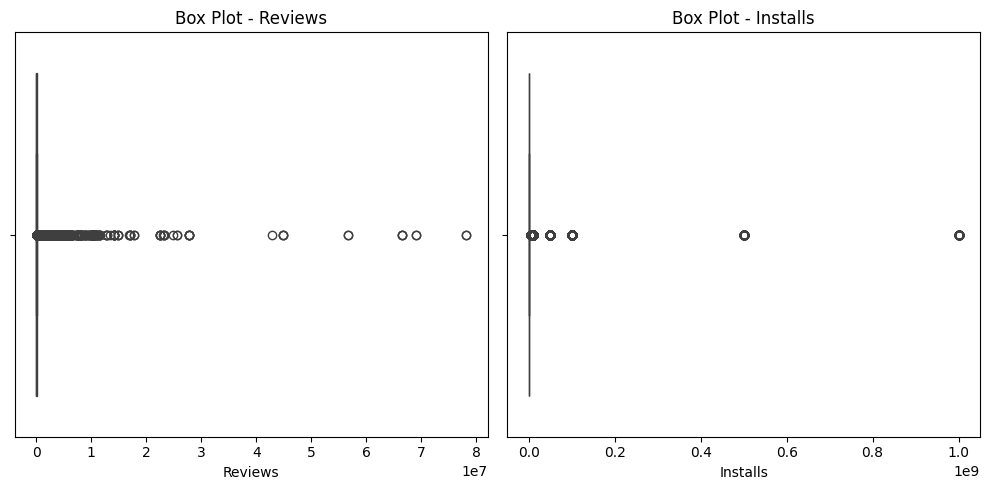

In [27]:
# Visualizing Outliers through Box Plots
# Set up the figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Box plot for Reviews
sns.boxplot(ax=axes[0], x=df_psdata['Reviews'])
axes[0].set_title('Box Plot - Reviews')

# Box plot for Installs
sns.boxplot(ax=axes[1], x=df_psdata['Installs'])
axes[1].set_title('Box Plot - Installs')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [28]:
# Show Dataset Rows & Columns count Before Removing Outliers
print('Shape Before Removing Outliers:')
print('Play Store Data Rows count:',df_psdata.shape[0])
print('Play Store Data Columns count:',df_psdata.shape[1])
print('User Reviews Data Rows count:',df_review.shape[0])
print('User Reviews Data Columns count:',df_review.shape[1],end='\n\n')

# Removing Outliers from Data
# Define the quantile range
quantile_low = 0.05
quantile_high = 0.95

# Remove outliers for Reviews column
df_psdata = df_psdata[(df_psdata['Reviews'] >= df_psdata['Reviews'].quantile(quantile_low)) &
                      (df_psdata['Reviews'] <= df_psdata['Reviews'].quantile(quantile_high))]

# Remove outliers for Installs column
df_psdata = df_psdata[(df_psdata['Installs'] >= df_psdata['Installs'].quantile(quantile_low)) &
                      (df_psdata['Installs'] <= df_psdata['Installs'].quantile(quantile_high))]

# Show Dataset Rows & Columns count After Removing Outliers
print('Shape After Removing Outliers:')
print('Play Store Data Rows count:',df_psdata.shape[0])
print('Play Store Data Columns count:',df_psdata.shape[1])
print('User Reviews Data Rows count:',df_review.shape[0])
print('User Reviews Data Columns count:',df_review.shape[1])


Shape Before Removing Outliers:
Play Store Data Rows count: 10357
Play Store Data Columns count: 13
User Reviews Data Rows count: 30679
User Reviews Data Columns count: 5

Shape After Removing Outliers:
Play Store Data Rows count: 9404
Play Store Data Columns count: 13
User Reviews Data Rows count: 30679
User Reviews Data Columns count: 5


In [29]:
# Dropping unnecessary columns for analysis from Play Store and User Reviews Dataset
# Drop the 'Current Ver' column from df_psdata
df_psdata = df_psdata.drop('Current Ver', axis=1)

# Drop the 'Translated_Review' column from df_review
df_review = df_review.drop('Translated_Review', axis=1)

print('Shape After Removing Unnecessary Columns:')
# Dataset Rows & Columns count
print('Play Store Data Rows count:',df_psdata.shape[0])
print('Play Store Data Columns count:',df_psdata.shape[1])
print('User Reviews Data Rows count:',df_review.shape[0])
print('User Reviews Data Columns count:',df_review.shape[1])


Shape After Removing Unnecessary Columns:
Play Store Data Rows count: 9404
Play Store Data Columns count: 12
User Reviews Data Rows count: 30679
User Reviews Data Columns count: 4


### Insights

The following actions were taken to make the datasets analysis-ready:

1. **Identifying Non-Numeric Reviews:**
   - Checked and printed rows with non-numeric characters in the 'Reviews' column.

2. **Removing Irrelevant Row:**
   - Dropped the row at index 10472 as it contained incorrect or irrelevant data, ensuring dataset integrity.

3. **Converting Reviews to Integer:**
   - Converted the 'Reviews' column to integer data type for numerical analysis.

4. **Converting Last Updated to Datetime:**
   - Converted the 'Last Updated' column to datetime format for temporal analysis.

5. **Handling Price Values:**
   - Created a function (`drop_dollar`) to drop the '$' symbol and convert the 'Price' column to float data type.

6. **Handling Installs Values:**
   - Created a function (`drop_plus`) to drop the '+' symbol and convert the 'Installs' column to integer data type.

7. **Converting Size Entries:**
   - Created a function (`kb_to_mb`) to convert size entries to MB and handle 'k' or 'M' units.

8. **Verifying Data Types:**
   - Checked and printed the updated data type information after the type conversion.

9. **Removing Duplicates:**
   - Removed duplicate rows from both the Play Store and User Reviews datasets.

10. **Handling Missing Values:**
    - Filled missing values for numerical columns with the median and categorical columns with the mode.
    - Checked and printed the updated number of missing values in both datasets.

11. **Handling Outliers:**
    - Visualized outliers through box plots for Reviews and Installs.
    - Removed outliers from data based on quantile range (5% to 95%) for Reviews and Installs.

12. **Removing Unnecessary Columns:**
   - Certain columns were considered non-significant to the analysis and were subsequently dropped. Specifically, the 'Current Ver' column in the Play Store Dataset (`df_psdata`) and the 'Translated_Review' column in the User Reviews Dataset (`df_review`) were excluded.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

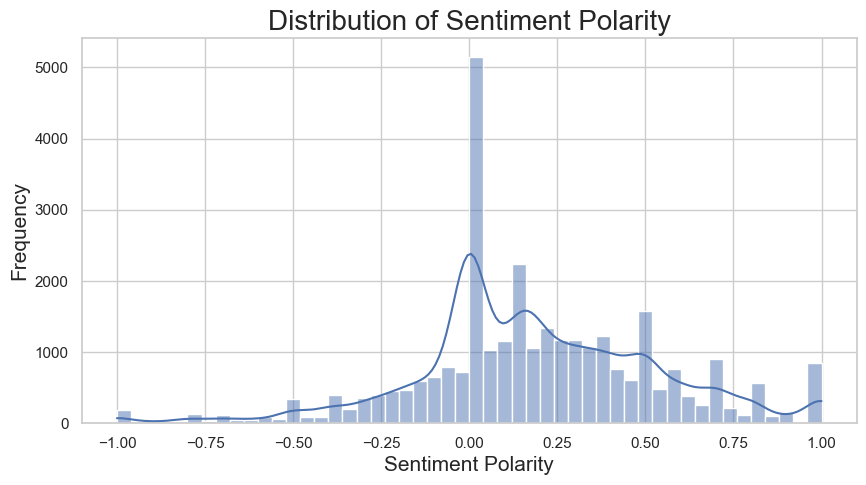

In [30]:
# Chart - 1 visualization code
# Distribution of Sentiment Polarity
# Set up the visualisation settings
sns.set(style='whitegrid')

# Plot distribution of Sentiment Polarity
plt.figure(figsize=(10, 5))
plt.title('Distribution of Sentiment Polarity',size=20)
sns.histplot(df_review['Sentiment_Polarity'], bins=50, kde=True)
plt.xlabel('Sentiment Polarity',size=15)
plt.ylabel('Frequency',size=15)
plt.show()


Histogram chart depict the polarity of reviews, offering insights into their positive or negative nature.


##### Insight(s) found from the chart

**Positive sentiment dominates:** The histogram shows a clear peak towards the positive side, indicating most apps have predominantly positive sentiment amongst users. This suggests most apps are well-received and appreciated by users.

**Presence of negative sentiment:** While less prominent, the histogram also shows a tail on the negative side. This suggests some apps do experience negative feedback and dissatisfaction from users. Analyzing this negativity can highlight areas for improvement or issues requiring developer attention.

**Distribution shape:** The shape of the distribution (skewed right) suggests a higher concentration of apps with significantly positive sentiment compared to those with profoundly negative sentiment. This implies a general trend of user satisfaction with most apps on the Play Store.

### Positive Business Impact:

1. **Overall Positive Sentiment:**
   - **Potential Positive Impact:** The dominance of positive sentiment indicates that most apps are well-received, which can contribute to positive user experiences, retention, and potentially attract new users. Positive reviews and satisfaction often lead to positive word-of-mouth, contributing to the app's popularity and success.

2. **Distribution Shape and User Satisfaction:**
   - **Positive Growth Opportunity:** The right-skewed distribution suggests a higher concentration of positively received apps. This implies a general trend of user satisfaction, which can contribute to positive growth. Developers can leverage this positive sentiment to reinforce features users appreciate and further enhance user experiences.

### Negative Growth Consideration:

1. **Presence of Negative Sentiment:**
   - **Potential Negative Impact:** The existence of negative sentiment, although less prominent, indicates that some apps face dissatisfaction. Unaddressed negative feedback can result in user churn, negative reviews, and a decline in the app's reputation. It may lead to users seeking alternative apps that better meet their expectations.

2. **Areas for Improvement:**
   - **Negative Growth Risk:** The presence of negative sentiment provides insights into areas that may require improvement. If these issues are not addressed promptly, they could lead to negative growth. Users' dissatisfaction may impact the app's ratings, user retention, and overall success in a competitive market.

#### Chart - 2

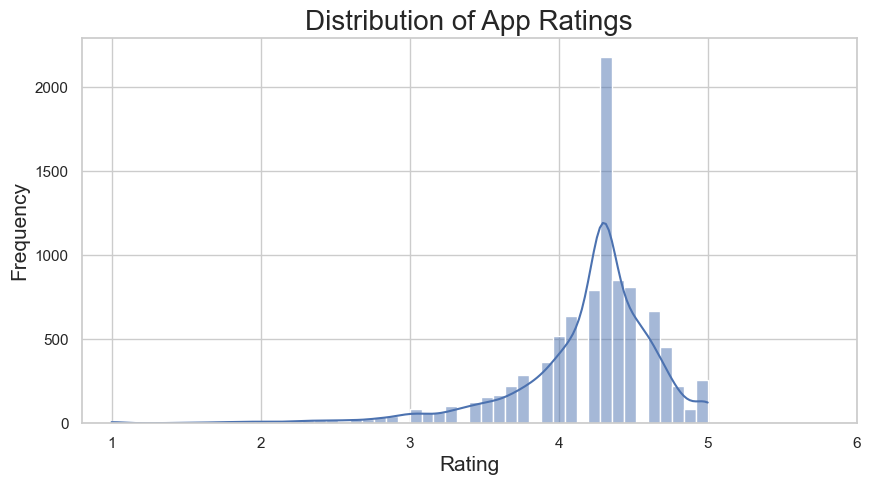

In [31]:
# Chart - 2 visualization code
# Distribution of App Ratings in Play Store Data
# Set up the visualisation settings
sns.set(style='whitegrid')

# Plot distribution of App Ratings
plt.figure(figsize=(10, 5))
plt.title('Distribution of App Ratings',size=20)
sns.histplot(df_psdata['Rating'], bins=50, kde=True)
plt.xlabel('Rating',size=15)
plt.xlim([None, 6])
plt.ylabel('Frequency',size=15)
plt.show()


Histogram chart  portray the distribution of app ratings from the Play Store data, providing a clear representation of the frequency of various rating levels assigned by users.

##### Insight(s) found from the chart

**Overall sentiment:** The majority of users are satisfied with the apps, as evidenced by the high concentration of positive ratings.

**Exceptional apps:** A notable fraction of users demonstrates high enthusiasm for the apps, as evidenced by the concentration observed between ratings 4 and 5.

**Areas for improvement:** There is some room for improvement, as evidenced by the presence of lower ratings. By analyzing the negative reviews, developers can identify specific areas where the apps can be enhanced.

### Positive Business Impact:

1. **Overall Positive Sentiment:**
   - **Potential Positive Impact:** The concentration of positive ratings suggests that the majority of users are satisfied with the apps. This positive sentiment can contribute to user retention, positive word-of-mouth, and potentially attract new users.

2. **Exceptional Apps and User Enthusiasm:**
   - **Potential Positive Impact:** The presence of a notable fraction of highly positive ratings indicates that some users are exceptionally enthusiastic about the apps. This could translate into a dedicated user base, potential advocates for the apps, and positive reviews that can enhance the apps' reputation.

3. **Areas for Improvement:**
   - **Positive Business Impact Opportunity:** Identifying areas for improvement, as indicated by lower ratings, presents an opportunity for positive business impact. By addressing specific concerns highlighted in negative reviews, developers can enhance the user experience, potentially leading to increased user satisfaction, better app reviews, and improved app performance.

### Negative Growth Consideration:
While the insights provide opportunities for positive impact, it's essential to consider the potential negative growth factors:

- **User Dissatisfaction:** The presence of lower ratings suggests that there are users who are not fully satisfied with the apps. If these concerns are not addressed promptly, it could lead to negative word-of-mouth, decreased user retention, and a potential decline in the apps' popularity.

- **Competitive Landscape:** If issues identified in the lower ratings are not addressed, it could impact the apps' competitiveness in the market. Users have various alternatives, and negative feedback might drive them towards competing apps that better meet their needs.

#### Chart - 3

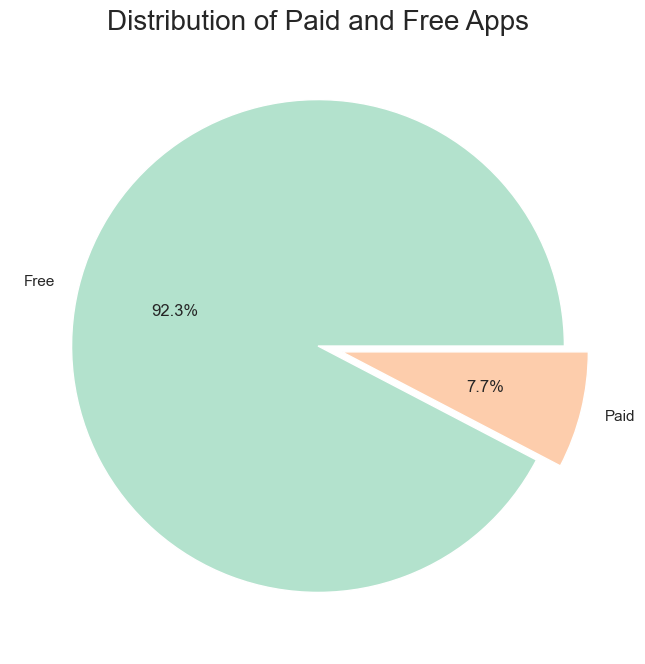

In [32]:
# Chart - 3 visualization code
# Distribution of App Types (Free and Paid)
# Count the occurrences of each app type in the 'Type' column
app_type = df_psdata['Type'].value_counts()

# Set up parameters for a pie chart
explode = (0, 0.1)
plt.figure(figsize=(8, 8))

# Create a pie chart to visualize the distribution of paid and free apps
plt.pie(app_type, labels=['Free', 'Paid'], autopct='%1.1f%%', explode=explode, colors=sns.color_palette('Pastel2'))

# Set the title of the pie chart
plt.title('Distribution of Paid and Free Apps',size=20)

# Display the pie chart
plt.show()


Pie chart to efficiently communicate the relative proportions of 'Free' and 'Paid' categories in the 'Type' column.

##### Insight(s) found from the chart

The larger slice of the pie chart represents the free apps, with 92.3% of the total. The smaller slice representing paid apps, with 7.7% of the total. This indicates that the vast majority of apps on the Google Play Store are free to download and use.

### Positive Business Impact:
1. **Increased User Engagement:** Free apps are more likely to attract downloads and user engagement due to the absence of a cost barrier. This can result in a broader user base and heightened interaction with the app.

2. **Diverse Monetization Options:** Although free, developers can explore various monetization avenues, including in-app purchases, advertising, and premium features. This flexibility allows developers to generate revenue through different channels.

### Negative Growth Consideration:
1. **Monetization Challenges:** The dominance of free apps may pose challenges for developers seeking direct revenue through upfront payments. Monetizing free apps effectively requires thoughtful strategies, and some developers may find it challenging to strike the right balance between user satisfaction and sustainable business practices.

2. **Competition and Visibility:** The sheer volume of free apps can lead to increased competition for visibility. Standing out in a crowded market becomes a critical challenge, and developers may need to invest in marketing and discoverability strategies.

3. **User Experience Concerns:** Monetization through advertising must be approached carefully to avoid negatively impacting the user experience. Excessive or intrusive ads can lead to user dissatisfaction and potential abandonment of the app.

#### Chart - 4

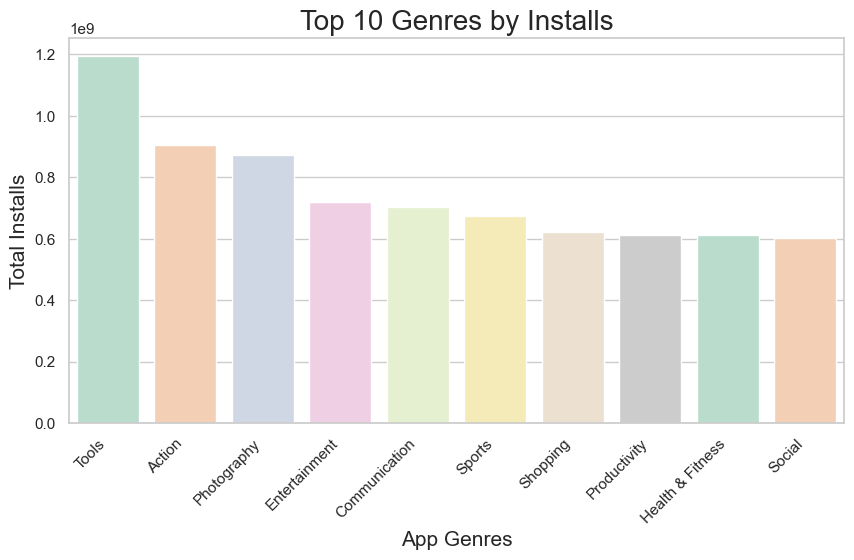

In [33]:
# Chart - 4 visualization code
# Top 10 Genres by Installs
# Group by Genre, summing the installs for each genre
genre_installs = df_psdata.groupby('Genres')['Installs'].sum().reset_index()

# Sort by installs in descending order
sorted_genre_installs = genre_installs.sort_values(by='Installs', ascending=False)

# Select the top 10 genres
top_10_genres = sorted_genre_installs.head(10)

# Set up the plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Genres', y='Installs', data=top_10_genres, palette='Pastel2')

# Customize the plot
plt.xticks(rotation=45,ha='right')
plt.title('Top 10 Genres by Installs',size=20)
plt.xlabel('App Genres',size=15)
plt.ylabel('Total Installs',size=15)

# Show the plot
plt.show()


Bar charts visually display the occurrence frequency of values across various levels of a categorical or nominal variable. I have chosen to use a bar chart to pinpoint the top 10 genres of apps by the number of installations they have.

##### Insight(s) found from the chart

- Tools apps are the most popular genre. This is likely due to the increasing reliance on smartphones and tablets for work and productivity.

- Action apps are the second most popular genre. Action games are typically fast-paced and exciting, and they appeal to a wide range of users.

- Photography apps are the third most popular genre. This is likely due to the increasing popularity of smartphone photography.

- Entertainment apps are the fourth most popular genre. Entertainment apps include various streaming services as well as social media apps.

- Communication apps are the fifth most popular genre. Communication apps include messaging apps and video conferencing apps.

### Positive Business Impact:
1. **Tools Apps Popularity:** With Tools apps being the most popular genre, businesses can capitalize on this trend by developing and optimizing apps that cater to work and productivity needs. This insight suggests a demand for applications that enhance users' efficiency and organization, presenting an opportunity for businesses to create valuable and practical tools.

2. **Action Apps Appeal:** The popularity of Action apps, known for their fast-paced and exciting nature, indicates a broad appeal. Developers can leverage this insight to create engaging and entertaining games, potentially attracting a wide user base. This genre's popularity suggests a demand for immersive and thrilling experiences, which can be monetized effectively.

3. **Photography Apps Trend:** The increasing popularity of Photography apps aligns with the growing trend of smartphone photography. Businesses can seize this opportunity by developing innovative photography apps, offering features that enhance photo editing, organization, and sharing. This genre's popularity reflects a consumer interest in visual content creation.

4. **Entertainment Apps Opportunities:** Entertainment apps, encompassing streaming services and social media apps, hold significant popularity. Businesses can explore opportunities within this genre, either by creating new content streaming services or optimizing social media platforms. This trend indicates a sustained demand for diverse entertainment options.

5. **Communication Apps Importance:** The popularity of Communication apps, including messaging and video conferencing, highlights the essential role of connectivity. Businesses can focus on creating user-friendly and feature-rich communication apps, meeting the increasing demand for seamless connectivity and collaboration.

### Negative Growth Consideration:

1. **Competitive Challenges:** If certain genres have a saturated market with intense competition, it may be challenging for new apps to gain visibility and user traction. This could lead to negative growth for apps in those highly competitive categories.

2. **Addressing Negative Reviews:** Negative sentiment in reviews or lower app ratings may indicate areas for improvement. Ignoring or failing to address these issues could result in negative user experiences, leading to decreased installs and usage.

3. **Adapting to Trends:** App markets are dynamic, and user preferences can change. Failing to adapt to emerging trends or technological advancements may result in declining popularity and negative growth for apps that become outdated.


#### Chart - 5

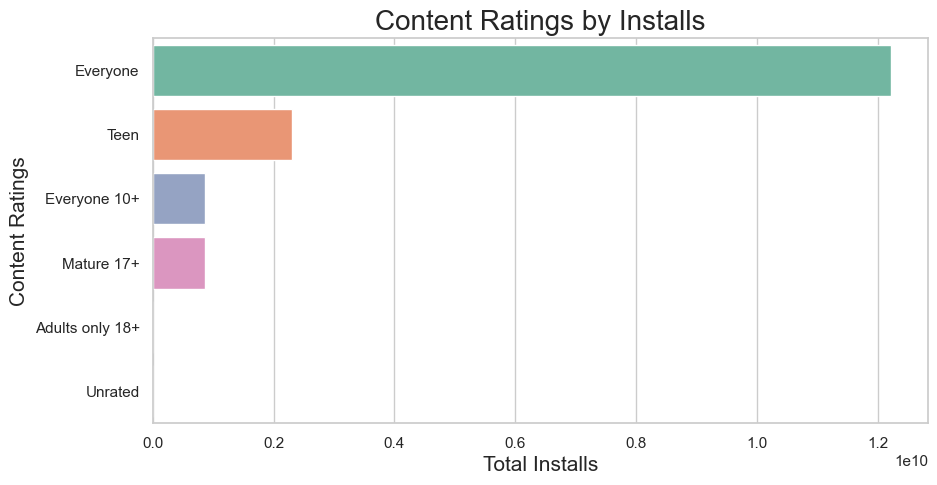

In [34]:
# Chart - 5 visualization code
# Content Ratings by Installs
# Group by Content Rating, summing the installs for each content rating
content_rating_installs = df_psdata.groupby('Content Rating')['Installs'].sum().reset_index()

# Sort by installs in descending order
sorted_content_rating_installs = content_rating_installs.sort_values(by='Installs', ascending=False)

# Set up the plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Installs', y='Content Rating', data=sorted_content_rating_installs, palette='Set2')

# Customize the plot
plt.title('Content Ratings by Installs',size=20)
plt.xlabel('Total Installs',size=15)
plt.ylabel('Content Ratings',size=15)

# Show the plot
plt.show()


Bar chart to analyze the variations in content ratings based on installations.

##### Insight(s) found from the chart

- The categories **Everyone** and **Teen** stand out with the highest number of installs, indicating preferences for apps suitable for all ages or users aged 13 and above. These categories encompass apps with minimal or mild content, including educational, entertainment, or social apps.

- The **Everyone 10+** category follows with the third-highest installs, suggesting a preference for apps suitable for users aged 10 and above. Such apps may contain more moderate content, such as fantasy or science fiction.

- The **Mature 17+** and **Adults only 18+** categories exhibit significantly fewer installs. This implies a limited preference for apps tailored to users aged 17 or older or 18 and older, which may feature intense or graphic content like violence, sexual content, drug use, or gambling.

- The **Unrated** category records the fewest installs, suggesting minimal interest in apps lacking official ratings. These apps may have unknown or variable content, potentially unsuitable for some users.


### Positive Business Impact:

- The **Everyone** and **Teen** categories exhibit the highest number of installs, suggesting a positive reception and indicating a market demand for apps suitable for a broad audience, including educational and entertainment content.

- The **Everyone 10+** category, with the third-highest installs, reflects a positive response to apps tailored for users aged 10 and above. This indicates potential business opportunities in developing content with moderate themes for this demographic.

### Negative Growth Consideration:

- Limited installs for the **Mature 17+** and **Adults only 18+** categories suggest a potential negative impact. The lower preference for apps with intense or graphic content for users aged 17 or older may indicate a narrower market, prompting consideration before heavy investment in such content development.

- The **Unrated** category, recording the fewest installs, highlights user reluctance towards apps lacking official ratings. This hesitation could be attributed to uncertainties about the app's content, posing a challenge for positive user engagement and potential business growth.

#### Chart - 6

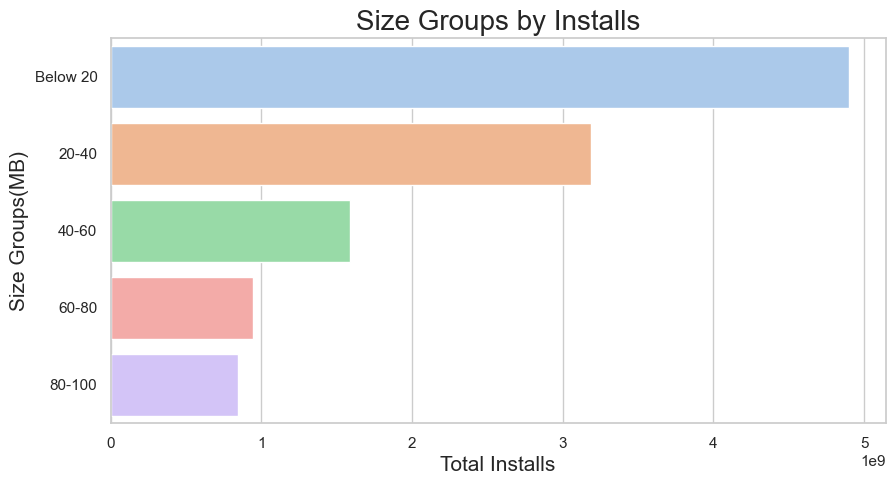

In [35]:
# Chart - 6 visualization code
# Size Groups by Installs
# Define the function to group app sizes
def size_groups(value):
    try:
        if value < 20:
            return 'Below 20'
        elif value >= 20 and value <= 40:
            return '20-40'
        elif value > 40 and value <= 60:
            return '40-60'
        elif value > 60 and value <= 80:
            return '60-80'
        elif value >80 and value <=100:
            return '80-100'
        else:
            return 'Above 100'
    except:
        return value

# Apps with size 'Varies with device' have dynamic sizes
# that are not explicitly stated, making it challenging to categorize them accurately.
# Exclude rows where size is 'Varies with device'
df_filtered_size = df_psdata[df_psdata['Size'] != 'Varies with device']

# Apply the size_groups function to create a new 'Size Group' column
df_filtered_size['Size Group'] = df_filtered_size['Size'].apply(size_groups)

# Group by Size Group, summing the installs for each size group
size_group_installs = df_filtered_size.groupby('Size Group')['Installs'].sum().reset_index()

# Sort by installs in descending order
sorted_size_group_installs = size_group_installs.sort_values(by='Installs', ascending=False)

# Set up the plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Installs', y='Size Group', data=sorted_size_group_installs, palette='pastel')

# Customize the plot
plt.title('Size Groups by Installs',size=20)
plt.xlabel('Total Installs',size=15)
plt.ylabel('Size Groups(MB)',size=15)

# Show the plot
plt.show()


Bar chart to show the connection between size groups and the total installs of Play Store apps.


##### Insight(s) found from the chart


- The size group with the most installs is the **below 20** group, followed by the **20-40** group, followed by the **40-60** group, then the **60-80** group, and finally the **80-100** group.
- The size group with the least installs is the **80-100** group, which has less than a quarter of the installs of the **below 20** group. This suggests that the users prefer smaller apps over larger apps. This could indicate that the users have limited storage space on their devices, or that they are more selective about the apps they download and install.

### Positive Business Impact:

1. **Optimizing App Sizes:**
   - Adapting app sizes to align with user preferences, especially in the popular **Below 20** and **20-40** size groups, can lead to increased downloads and positive user experiences.
   
2. **Enhancing User Satisfaction:**
   - Meeting user expectations for smaller app sizes addresses potential device constraints and enhances overall user satisfaction.
   
3. **Strategic Development:**
   - Focusing on developing apps within the preferred size ranges may result in a positive impact on business growth.

### Negative Growth Consideration:

1. **Limited Installs in 80-100 Size Group:**
   - The **80-100** size group exhibits significantly fewer installs, raising concerns about potential negative growth.

2. **User Preference Challenges:**
   - Neglecting user preferences for smaller apps, as evident in the popular size groups, may lead to reduced downloads and user engagement.

3. **App Availability Concerns:**
   - Insufficient installs in the **80-100** size group may indicate either a lack of user interest in larger apps or a scarcity of apps within this size range.

#### Chart - 7

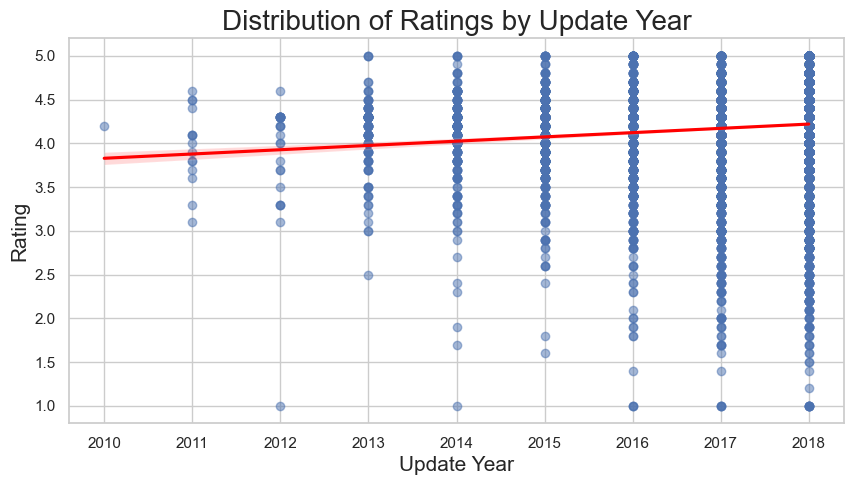

In [36]:
# Chart - 7 visualization code
# Distribution of Ratings by Update Year
# Extract the year from the 'Last Updated' column
df_psdata['Update Year'] = df_psdata['Last Updated'].dt.year

# Set up the regression plot
plt.figure(figsize=(10, 5))
sns.regplot(x='Update Year', y='Rating', data=df_psdata, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

# Customize the plot
plt.title('Distribution of Ratings by Update Year',size=20)
plt.xlabel('Update Year',size=15)
plt.ylabel('Rating',size=15)

# Show the plot
plt.show()


 Regplot to explore the distribution of Ratings with respect to Update Years.

##### Insight(s) found from the chart

-  The average rating has shown an improvement, rising from approximately 3.5 in 2010 to nearly 4.5 in 2018. This indicates a general trend of increasing satisfaction among users with the product over the years.

-  The red line shows that the overall trend is towards increasing ratings. This is a positive sign for the product.

-  The slope of the red line is positive, which indicates that the relationship between rating and update year is positive. This means that ratings tend to increase as the update year increases.

### Positive Business Impact:
1. **Increasing Average Rating:** The rise in average ratings from approximately 3.5 in 2010 to nearly 4.5 in 2018 indicates an upward trend in user satisfaction. This is a positive signal as it suggests that users are generally more content with the product over time.

2. **Improvement Over Time:** The red line representing the trend shows a positive slope, indicating a consistent increase in ratings. This implies that developers are making continuous improvements, positively influencing user satisfaction.

3. **Possible Explanations for Rating Increase:**

  Introduction of New Features: Developers may be adding new features, enhancing the product's functionality, and providing users with more value.

  Enhancements in Reliability and Usability: The product may be improving in terms of reliability and user-friendliness, contributing to a better overall experience.

  Increased Popularity: A growing user base could lead to a more positive user experience, as popularity often correlates with user satisfaction.

### Negative Growth Consideration:
1. **Limited Historical Context:** While the increasing trend is positive, it's crucial to consider the context. Ratings might be influenced by various factors, and without a deeper understanding of the product's evolution or changes, solely relying on the increasing trend might be limited.

2. **Potential Plateau:** Over time, achieving consistently higher ratings becomes challenging, and there might be a plateau effect. If the ratings reach a saturation point, further improvements might yield diminishing returns, potentially leading to stagnation.

3. **User Base Shift:** Ratings might be influenced by changes in the user base. If the user demographic shifts or if newer users have different expectations, the historical trend may not accurately reflect the current user sentiment.


#### Chart - 8

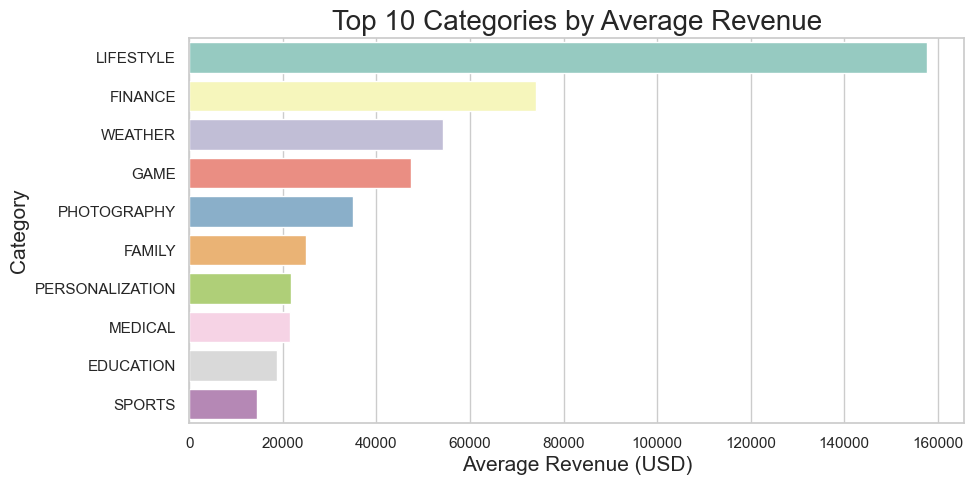

In [37]:
# Chart - 8 visualization code
# Top 10 Categories by Average Revenue
# Calculate Revenue for each app
df_psdata['Revenue'] = df_psdata['Installs'] * df_psdata['Price']

# Group by Category and calculate the mean revenue, sorted in descending order
category_revenue = df_psdata.groupby('Category')['Revenue'].mean().sort_values(ascending=False)

# Select the top 10 categories
top_10_categories_revenue = category_revenue.head(10)

# Set up the plot
plt.figure(figsize=(10, 5))

# Title of the plot
plt.title('Top 10 Categories by Average Revenue',size=20)

# Create a bar plot for the top 10 categories
sns.barplot(x=top_10_categories_revenue.values, y=top_10_categories_revenue.index, palette='Set3')

# Labeling the x and y axes
plt.xlabel('Average Revenue (USD)',size=15)
plt.ylabel('Category',size=15)

# Display the plot
plt.show()


 Bar chart to explore the top 10 categories by average revenue.

##### Insight(s) found from the chart

- The top 3 revenue-generating categories, namely Lifestyle, Finance, and Weather, indicate a willingness among users to invest in products and services associated with their personal lives and finances.

- The following 3 categories in revenue ranking Game, Photography, and Family are all linked to entertainment and leisure, signaling an increasing trend of expenditure on experiences meant for enjoyment and shared moments.

- Contrastingly, the Sports category records the lowest average revenue, implying a lack of popularity among users. Similarly, the Education category follows closely with the second lowest average revenue, highlighting lower profitability.

- The Personalization category secures the fourth-lowest average revenue, suggesting a relatively lower level of user interest. Lastly, the Medical category ranks third lowest in average revenue, indicating potential challenges in terms of convenience or security for apps within this category.

### Positive Business Impact:
1. **Strategic Focus on High-Revenue Categories:** Businesses can leverage the knowledge about the top revenue-generating categories like Lifestyle, Finance, and Weather to strategically focus on developing and optimizing apps within these genres. This aligns with user preferences and the willingness to invest in products associated with personal lives and finances.

2. **Entertainment and Leisure Trends:** Recognizing the revenue potential in Game, Photography, and Family categories allows businesses to tap into the increasing trend of expenditure on experiences related to entertainment and leisure. Developers can create engaging and enjoyable apps within these genres to attract users and generate revenue.

### Negative Growth Consideration:
1. **Low Revenue in Sports and Education Categories:** The Sports category recording the lowest average revenue suggests a lack of popularity among users. Similarly, the Education category having the second lowest average revenue indicates lower profitability. If businesses are heavily invested in these categories, they may face challenges in generating substantial revenue. This doesn't necessarily lead to negative growth, but it does signal areas for strategic evaluation and potential adjustments.

2. **Challenges in Personalization and Medical Categories:** The relatively low average revenue in the Personalization and Medical categories suggests challenges. In the Personalization category, there may be a lower level of user interest, while in the Medical category, potential issues related to convenience or security may be impacting revenue. Addressing these challenges through targeted improvements or considering alternative strategies is essential to mitigate any negative impact.



#### Chart - 9

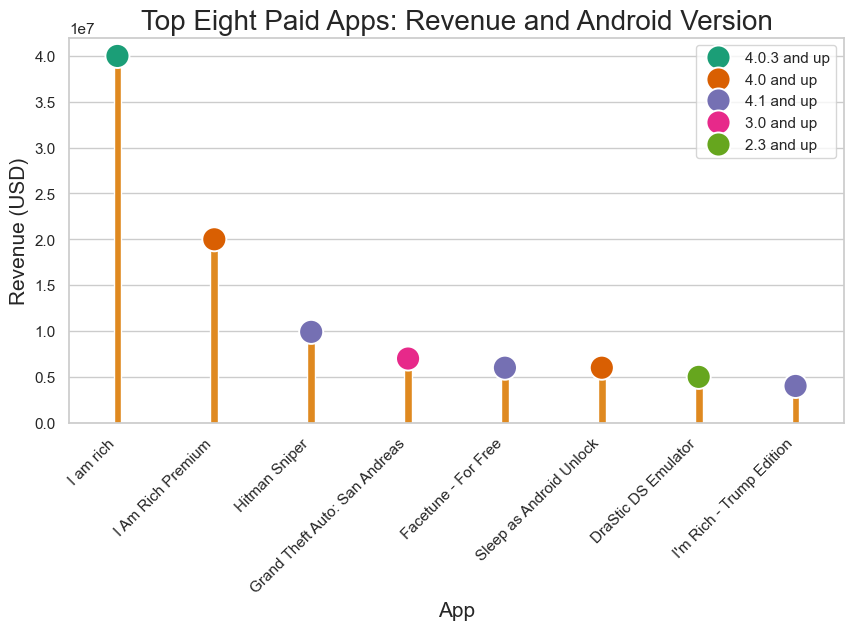

In [38]:
# Chart - 9 visualization code
# Comparing the Revenue and Android Version of the Top 8 Paid Apps in the Play Store
# Set style to 'whitegrid'
sns.set(style='whitegrid')

#Exclude apps with Android version 'Varies with device'
top_8_paid_apps = df_psdata[df_psdata['Android Ver'] != 'Varies with device'].nlargest(8, 'Revenue', keep='first')

# Set up the plot
plt.figure(figsize=(10, 5))

# Plotting lollipops for revenue using Seaborn scatterplot
sns.scatterplot(x='App', y='Revenue', hue='Android Ver', data=top_8_paid_apps, palette='Dark2', s=300, zorder=2)

# Plotting bars for revenue using Seaborn barplot
sns.barplot(x='App', y='Revenue', data=top_8_paid_apps, color='darkorange', width=0.08, zorder=1)

# Customize the plot
plt.xlabel('App', size=15)
plt.xticks(rotation=45,ha='right')
plt.ylabel('Revenue (USD)', size=15)
plt.title('Top Eight Paid Apps: Revenue and Android Version', size=20)

# Show the plot
plt.show()


Lollipop charts offer a visually appealing alternative to traditional bar charts. In this chart, the lollipop's colour shows the Android version, while the length represents the app's revenue. It effectively highlights the top 10 revenue-generating apps and provides insights into Android version compatibility making this visualization my preferred choice.

##### Insight(s) found from the chart


1. The apps with Android versions 4.0 and above dominate the higher revenue ranks, suggesting a correlation between app compatibility with newer Android versions and revenue generation.

2. Among the top 8 high revenue apps, six are designed for Android versions 4.0 and above. The exceptions are "Grand Theft Auto: San Andreas" (Android 3.0 and up) and "DraStic DS Emulator" (Android 2.3 and up), both of which are on the lower end of the revenue spectrum.

### Positive Business Impact:

1. **Targeted Development:** Knowing that apps compatible with Android versions 4.0 and above tend to generate higher revenue can guide developers in focusing their efforts on creating and optimizing apps for these versions. This targeted development approach may result in more successful and lucrative applications.

2. **Market Alignment:** Aligning app development with the Android versions preferred by users can enhance market penetration and user adoption. This alignment may lead to increased downloads and, subsequently, higher revenue.

### Negative Growth Consideration:

1. **Compatibility Challenges:** Apps designed for older Android versions (e.g., Android 2.3 and 3.0) are associated with lower revenue. Investing resources in developing or maintaining apps for these versions may not yield significant returns, potentially leading to negative growth.

2. **Revenue Discrepancy:** The notable revenue difference between apps for Android 4.0 and above versus older versions suggests a market preference for more recent Android iterations. Failing to adapt to this preference may result in negative growth as user demand shifts toward newer Android releases.

#### Chart - 10

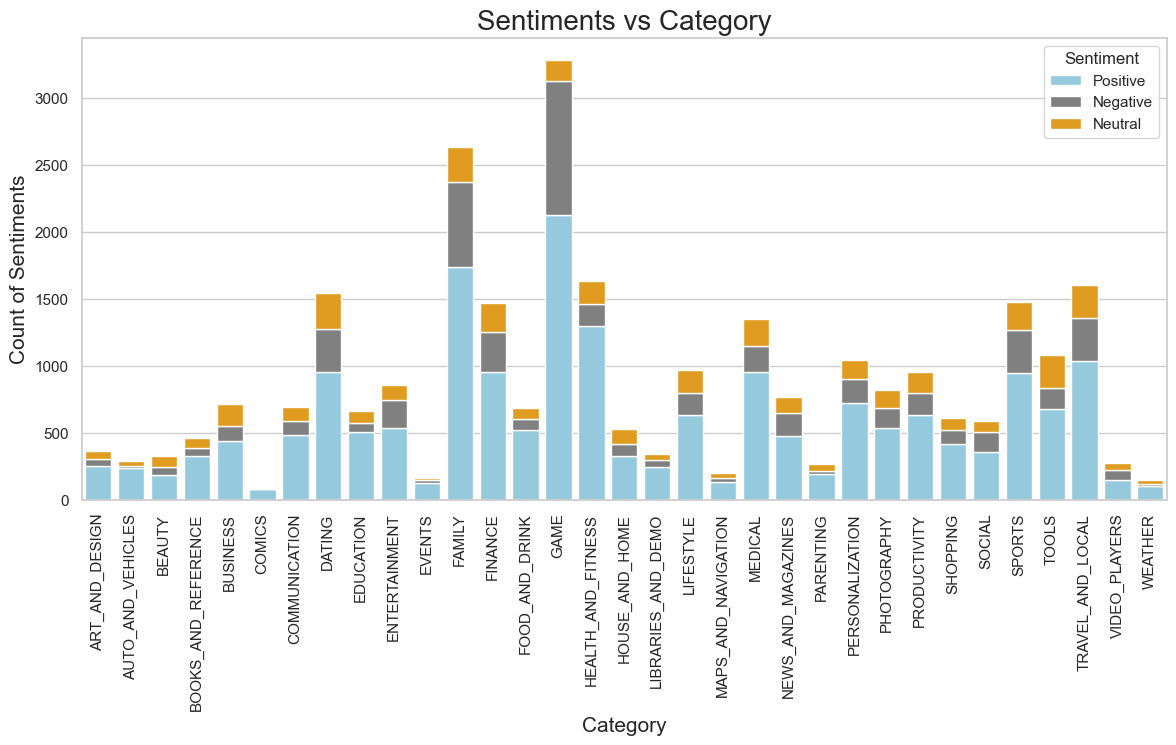

In [39]:
# Chart - 10 visualization code
# Sentiment counts across categories.
# Set style to 'whitegrid'
sns.set(style='whitegrid')

# Set the figure size
plt.figure(figsize=(14, 6))

# Merging the Play Store data with the User Reviews data
merged_df = pd.merge(df_psdata, df_review, on='App', how='inner')

# Calculating the average sentiment polarity for each app
average_sentiment_polarity = merged_df.groupby('App')['Sentiment_Polarity'].mean()

# Merging the average sentiment polarity back to the original play store dataframe
play_store_sentiment_df = df_psdata.join(average_sentiment_polarity, on='App')

# Count the number of sentiments for each category
grouped_df = merged_df.groupby(['Category', 'Sentiment']).size().unstack()

sns.barplot(data=grouped_df.reset_index(), x='Category', y='Positive', color='skyblue', label='Positive')
sns.barplot(data=grouped_df.reset_index(), x='Category', y='Negative', color='gray', bottom=grouped_df['Positive'], label='Negative')
sns.barplot(data=grouped_df.reset_index(), x='Category', y='Neutral', color='orange', bottom=grouped_df['Positive'] + grouped_df['Negative'], label='Neutral')

# Adding labels and title
plt.xlabel('Category',size=15)
plt.xticks(rotation=90)
plt.ylabel('Count of Sentiments',size=15)
plt.title('Sentiments vs Category',size=20)

# Adding legend
plt.legend(title='Sentiment')

# Displaying the plot
plt.show()


Stacked bar charts to compare the composition of different components that contribute to a whole. Each bar is divided into sub-bars, representing levels of the second categorical variable, offering a clear depiction of contributions to the total, display sentiment counts across categories.

##### Insight(s) found from the chart

Top 5 categories with the highest positive sentiments:

- GAME
- FAMILY
- HEALTH_AND_FITNESS
- TRAVEL_AND_LOCAL
- DATING

Top 5 categories with the highest negative sentiments:
- GAME
- FAMILY
- TRAVEL_AND_LOCAL
- DATING
- SPORTS

The stacked bar chart reveals a complex interplay of positive and negative sentiments across different categories. While people express positive sentiments towards categories like games, family, health and fitness, travel and local, and dating, there is also a notable presence of negative sentiment associated with most of these same categories.

### Positive Business Impact:
1. **Mixed Sentiments Across Top Categories:**

  The presence of both positive and negative sentiments within the same categories (GAME, FAMILY, TRAVEL_AND_LOCAL, DATING) suggests a nuanced user experience. Users seem to have mixed feelings and varied interactions within these categories.

2. **Positive Exclusivity in HEALTH_AND_FITNESS:**

  HEALTH_AND_FITNESS stands out for exclusively having positive sentiments, indicating a notably favorable perception among users. This category appears to provide positive experiences with very less negative sentiments.

### Negative Growth Consideration:

1. **Addressing Negative Sentiments:**

  Negative sentiments within the same categories suggest potential challenges or dissatisfaction among users. Ignoring or neglecting these negative sentiments may lead to negative growth, impacting user retention and brand reputation.

2. **Mitigating Challenges in SPORTS:**

  Given the high negative sentiments in the SPORTS category, businesses should conduct a detailed analysis to understand and address the challenges. Proactive measures to improve user experiences in this category are essential to preventing negative growth.

#### Chart - 11

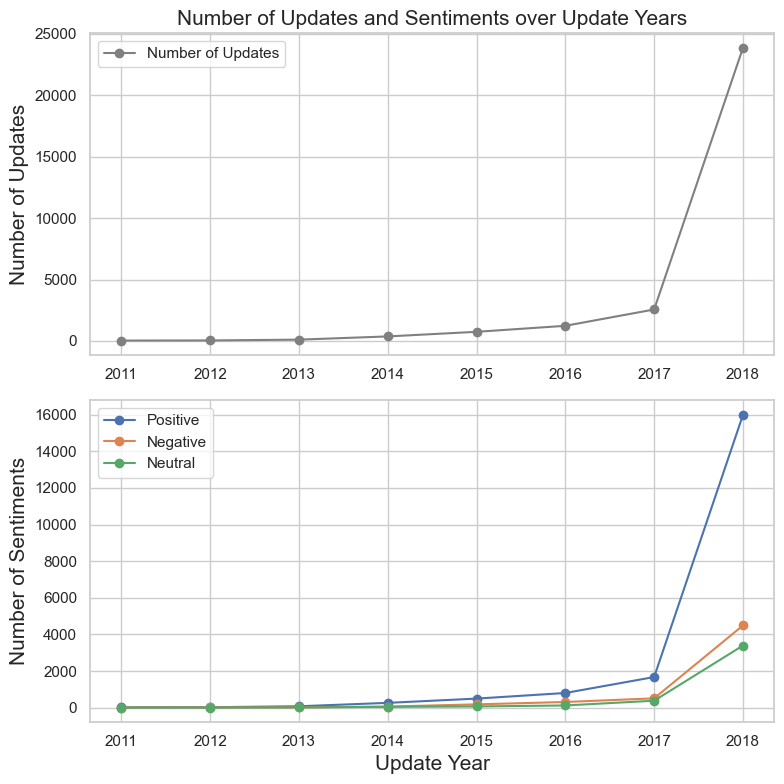

In [40]:
# Chart - 11 visualization code
# Progression of update counts and the distribution of sentiment counts over time
# Group by 'Update Year' and count the number of updates
update_counts = merged_df.groupby("Update Year")["App"].count()

# Group by 'Update Year' and 'Sentiment' and count occurrences
sentiment_counts = merged_df.groupby(['Update Year', 'Sentiment']).size().unstack()

# Plotting
plt.figure(figsize=(8, 8))

# Plotting the number of updates received
plt.subplot(2, 1, 1)
plt.plot(update_counts.index, update_counts, label='Number of Updates', marker='o', color='gray')
plt.ylabel('Number of Updates', size=15)
plt.title('Number of Updates and Sentiments over Update Years', size=15)
plt.legend()

# Plotting sentiments
plt.subplot(2, 1, 2)
plt.plot(sentiment_counts.index, sentiment_counts['Positive'], label='Positive', marker='o')
plt.plot(sentiment_counts.index, sentiment_counts['Negative'], label='Negative', marker='o')
plt.plot(sentiment_counts.index, sentiment_counts['Neutral'], label='Neutral', marker='o')
plt.xlabel('Update Year', size=15)
plt.ylabel('Number of Sentiments', size=15)
plt.legend()

# Adjust layout for better readability
plt.tight_layout()

# Show the plot
plt.show()


 Line charts to illustrate the progression of update counts and the distribution of sentiment counts over time. 

##### Insight(s) found from the chart

- There is a general trend of increasing positive sentiments over time. This suggests that people are generally becoming more satisfied with the updates they are receiving.

- The number of updates is increasing over time. This suggests that the developers are releasing new updates more frequently.

- The number of negative sentiments is relatively stable. This suggests that people are generally not very unhappy with the updates they are receiving.

### Positive Business Impact:

- **Increasing Positive Sentiments Over Time:**
  Positive sentiments trending upward over time indicates growing satisfaction among users. This is a positive signal for the business, as satisfied customers are more likely to stay engaged, recommend the product to others, and contribute positively to the brand image.

- **Increasing Number of Updates:**
  The rising number of updates implies that developers are actively working on improving the product and addressing user needs. This can have a positive impact on user engagement and loyalty, as users appreciate continuous improvement and new features.

- **Stable Negative Sentiments:**
  The stability of negative sentiments suggests that, in general, users are not significantly dissatisfied with the updates. While some negative sentiments may be inevitable, the fact that they are stable indicates that any issues are not escalating. This stability can be seen as a positive aspect, as it implies that negative feedback is manageable and not worsening.

### Negative Growth Consideration:
- **Continuously Monitor Negative Feedback:**
  Regularly monitoring negative sentiments and feedback can help identify specific areas for improvement. Even if negative sentiments are stable, addressing specific concerns can lead to enhanced customer satisfaction.

- **Engage with Users:**
  Proactively engaging with users to understand their concerns and suggestions can provide valuable insights. Addressing user feedback and concerns demonstrates a commitment to customer satisfaction and can contribute to positive growth.

- **Competitor Analysis:**
  Assessing competitor products and user feedback can provide a comparative perspective. Understanding what competitors are doing well and areas where they face challenges can help in refining the business strategy.



#### Chart - 12

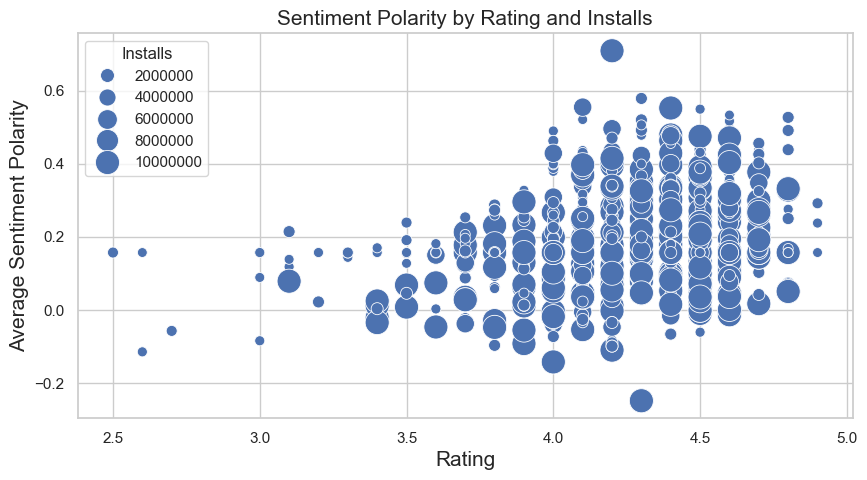

In [41]:
# Chart - 12 visualization code
# Relationship between Sentiment Polarity, Rating, and Installs
# Set style to 'whitegrid'
sns.set(style='whitegrid')

# Set up the plot
plt.figure(figsize=(10, 5))

# Scatter plot with size based on the number of installs
sns.scatterplot(x='Rating', y='Sentiment_Polarity', size='Installs', data=play_store_sentiment_df, sizes=(50, 300), edgecolor='white',legend=True)

# Customize the plot
plt.title('Sentiment Polarity by Rating and Installs', size=15)
plt.xlabel('Rating', size=15)
plt.ylabel('Average Sentiment Polarity', size=15)

# Show the plot
plt.show()


A bubble chart visually represents data points as bubbles, it's an extension of a scatter plot that uses the size of the data points to represent a third dimension of data, making it ideal for illustrating the relationships among three variables. So, I used it to explore the connections between average sentiment polarity, app rating, and the number of installs.

##### Insight(s) found from the chart


1. **Apps with higher ratings tend to have higher average sentiment polarity:** This correlation is logical, as users are more inclined to leave positive reviews for apps they enjoy using.

2. **Niche Apps with High Sentiment Polarity:**
Some apps exhibit high average sentiment polarity despite having relatively low install counts. This indicates the presence of niche apps that are deeply cherished by their user base, even though they may not enjoy widespread popularity.

3. **Popularity vs. Sentiment Polarity Discrepancy:**
The large bubbles representing the most installed apps generally show lower average sentiment polarity. This implies that widespread popularity doesn't consistently align with positive user sentiment.

### Positive Business Impact:
- **Identifying popular apps with high sentiment:** Focusing marketing efforts towards popular apps with high sentiment polarity can further boost their popularity and attract new users.

- **Promoting niche apps with high sentiment:** Promoting niche apps with high sentiment polarity can help them reach their target audience and achieve sustainable growth.

- **Understanding user sentiment variations:** By analyzing how sentiment polarity varies across different app features and user segments, developers can identify areas for improvement and implement changes to increase user satisfaction.

- **Prioritizing feedback based on popularity and sentiment:** Insights from the chart can guide developers in prioritizing user feedback based on both app popularity and user sentiment, ensuring resources are allocated effectively.

### Negative Growth Consideration:
- **Focusing solely on popular apps:** Focusing solely on promoting popular apps might neglect niche apps with high user satisfaction, potentially missing out on valuable market segments.

- **Misinterpreting sentiment polarity:** Taking average sentiment polarity at face value might lead to overlooking important aspects of user feedback. A deeper analysis of individual reviews is necessary to understand specific user concerns.

- **Ignoring install count trends:** Ignoring the relationship between install count and sentiment polarity might result in neglecting potential issues with popular apps, leading to user churn and dissatisfaction.

#### Chart - 13

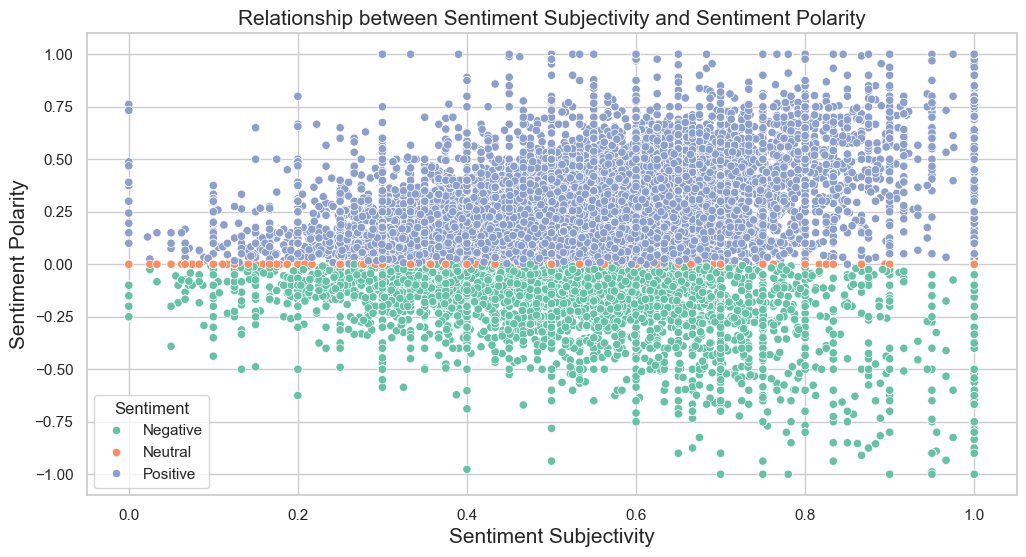

In [42]:
# Chart - 13 visualization code
# Relationship between Sentiment Subjectivity and Sentiment Polarity
# Set the size of the figure
plt.figure(figsize=(12, 6))

# Create a scatter plot using seaborn
sns.scatterplot(data=merged_df, x='Sentiment_Subjectivity', y='Sentiment_Polarity', hue='Sentiment', palette='Set2')

# Set labels for the x and y axes
plt.xlabel('Sentiment Subjectivity', size=15)
plt.ylabel('Sentiment Polarity', size=15)

# Set the title of the plot
plt.title('Relationship between Sentiment Subjectivity and Sentiment Polarity', size=15)

# Display the plot
plt.show()


Scatter plot to identify the patterns between Sentiment Subjectivity and Sentiment Polarity with the Sentiment variable represented by hue.

##### Insight(s) found from the chart

The scatter plot of Sentiment Polarity and Sentiment Subjectivity shows a moderate positive correlation between the two variables. This means that, in general, as sentiment polarity increases, sentiment subjectivity tends to increase as well. However, the relationship is not very strong. This suggests that there is a tendency for people to express their opinions more strongly when they are feeling positive than when they are feeling negative.

### Positive Business Impact:
- **Targeted Marketing:** Understanding that positive sentiments are linked with increased subjectivity, businesses can tailor marketing messages and campaigns to resonate with the emotional and expressive aspects of their satisfied customers.

- **Enhanced Customer Engagement:** Recognizing the correlation, businesses can focus on creating platforms for customers to share their positive experiences in a more detailed and expressive manner. This could include encouraging reviews, testimonials, or social media interactions that capture the enthusiasm of satisfied customers.

- **Product/Service Improvements:** Analyzing the correlation might lead to insights into what aspects of products or services generate strong positive sentiments. Businesses can use this information to prioritize and refine features that contribute to customer satisfaction.

### Negative Growth Consideration:
- **Overreliance on Subjective Opinions:** Businesses should not solely rely on subjective opinions to drive decisions, as they may not reflect broader customer sentiment or objective performance metrics.

- **Misinterpretation of Feedback:** Strong expressions of negative sentiment may not always be indicative of a widespread issue. Careful analysis and context-specific interpretation are crucial.

- **Potential for Bias:** Subjective opinions may be influenced by individual biases, personal experiences, and external factors, potentially leading to inaccurate assessments of overall customer sentiment.

#### Chart - 14 - Correlation Heatmap

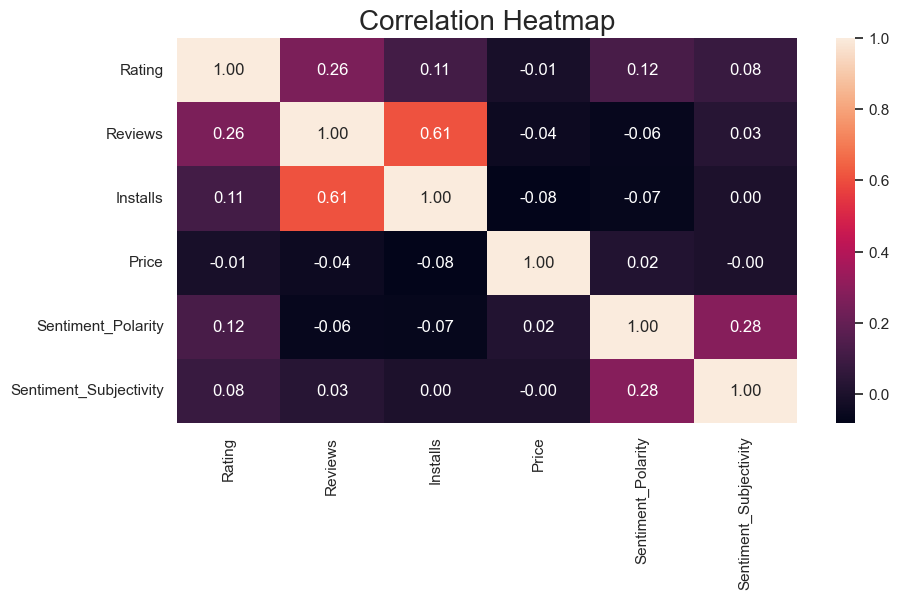

In [43]:
# Chart - 14 - Correlation Heatmap visualization code
# Relationships among Rating, Reviews, Installs, Price, Sentiment_Polarity, and Sentiment_Subjectivity
# Selecting numerical columns from the merged dataframe
numerical_columns = merged_df[['Rating', 'Reviews', 'Installs', 'Price', 'Sentiment_Polarity', 'Sentiment_Subjectivity']]

# Create a correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='rocket', fmt=".2f")
plt.title('Correlation Heatmap',size=20)
plt.show()


 Correlation heatmap to find the relationships among Rating, Reviews, Installs, Price, Sentiment_Polarity, and Sentiment_Subjectivity.

##### Insight(s) found from the chart

- Rating has a moderate positive correlation with Reviews, Installs, and Sentiment_Polarity. This means that apps with higher ratings tend to have more reviews, more installs, and more positive sentiment in their reviews.
Rating has a weak negative correlation with Price. This means that apps with higher ratings tend to be slightly cheaper.

- Reviews has a strong positive correlation with Installs. This means that apps with more reviews tend to have more installs.
Reviews has a weak negative correlation with Price. This means that apps with more reviews tend to be slightly cheaper.

- Installs has a weak negative correlation with Price. This means that apps with more installs tend to be slightly cheaper.

- Sentiment_Polarity has a moderate positive correlation with Sentiment_Subjectivity. This means that apps with more positive sentiment in their reviews tend to have slightly more subjective reviews.

#### Chart - 15 - Pair Plot

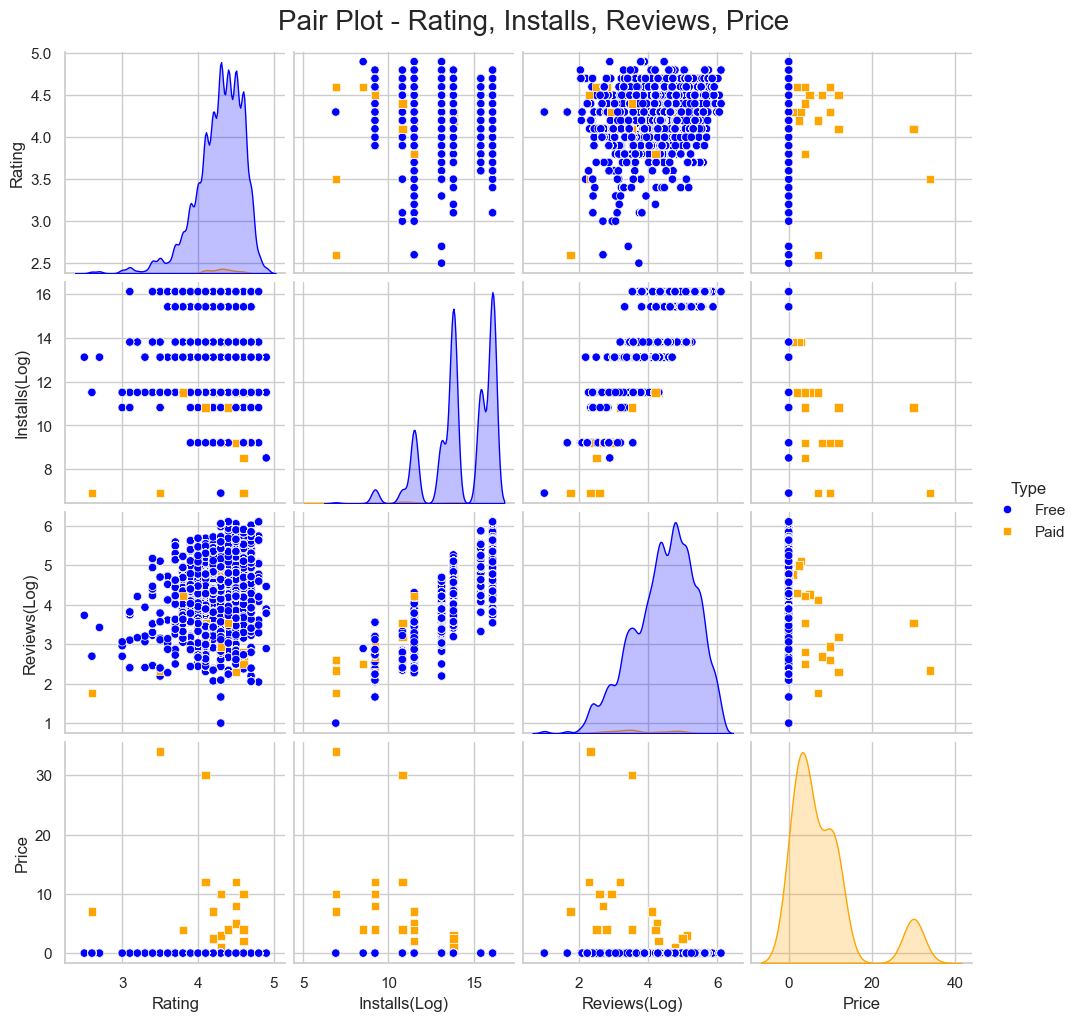

In [44]:
# Chart - 15 - Pair Plot visualization code
# Correlations among Rating, Installs, Reviews and Price.
# Selecting numerical columns from the merged dataframe
included_columns = merged_df[['Rating', 'Installs', 'Reviews', 'Price', 'Type']]

# Log-transform 'Installs' and 'Reviews'
included_columns['Installs(Log)'] = np.log(included_columns['Installs'])
included_columns['Reviews(Log)'] = np.log10(included_columns['Reviews'])

# Selecting columns for pair plot
selected_columns = included_columns[['Rating', 'Installs(Log)', 'Reviews(Log)', 'Price', 'Type']]

# Create a pair plot
p = sns.pairplot(selected_columns, hue='Type', markers=["o", "s"], palette={"Free": "blue", "Paid": "orange"})
p.fig.suptitle("Pair Plot - Rating, Installs, Reviews, Price", x=0.5, y=1.02, fontsize=20)

# Show the plot
plt.show()


Pair plot to explore the patterns and correlations between Rating, Installs, Reviews and Price.

##### Insight(s) found from the chart

- **Rating and Installs:** There is a positive correlation between rating and installs, meaning that apps with higher ratings tend to have more installs. This is likely because users are more likely to install apps that have been positively reviewed by other users.

- **Rating and Reviews:** There is also a positive correlation between rating and reviews, meaning that apps with higher ratings tend to have more reviews. This is likely because users are more likely to write reviews for apps that they enjoy using.

- **Rating and Price:** There is a weak negative correlation between rating and price, meaning that apps with higher ratings tend to be slightly cheaper. This is likely because developers of high-quality apps are able to charge lower prices due to the high demand for their apps.

- **Installs and Reviews:** There is a strong positive correlation between installs and reviews, meaning that apps with more installs tend to have more reviews. This is likely because users are more likely to write reviews for apps that they have used extensively.

- **Installs and Price:** There is a weak negative correlation between installs and price, meaning that apps with more installs tend to be slightly cheaper. This is likely because developers of popular apps are able to charge lower prices due to the high volume of installs.



### Recommendations:
- **Strategic Development in Popular Genres:**
  Acknowledge the popularity of certain genres, such as Tools, Action, Photography, and Entertainment.
  Consider investing in or refining apps within these genres to align with user preferences and maximize engagement.

- **Emphasize Free Apps:**
  Free apps overwhelmingly dominate the market, indicating the significance of providing an engaging free version to attract users.
  Given that the majority of apps are free, focus on monetization strategies that complement the free model, such as in-app purchases, ads, or premium features.

- **Optimize App Size:**
  Recognize the preference for smaller apps, as indicated by the popularity of the below 20 and 20-40 MB size groups.
  Ensure that new app developments and updates prioritize efficiency and minimal storage requirements to align with user preferences for smaller-sized apps.

- **Tailor Content Ratings:**
  Understand the user preference for Everyone and Teen categories and ensure new apps align with these preferences.
  Be mindful of the limited interest in Mature and Adults-only categories, adjusting content accordingly.

- **Strategic Revenue Generation:**
  Consider app development or improvements in categories that generate higher revenue, such as Lifestyle, Finance, and Weather.
  Evaluate user preferences within lower-revenue categories to identify opportunities for enhancement.

- **Compatibility with Latest Android Versions:**
  Given the correlation between higher revenue and compatibility with newer Android versions, prioritize app development and updates for the latest versions of the Android operating system.

- **User Engagement in Popular Categories:**
  Recognize the positive sentiments associated with popular categories like Games, Family, Health and Fitness, Travel and Local, and Dating.
  Strategically engage users through marketing, promotions, and feature enhancements in these categories.

- **Continuous Improvement:**
  Monitor the progression of update counts and user sentiments over time.
  Respond to user feedback with timely updates to demonstrate a commitment to app improvement.
  
- **Focus on Positive User Sentiment:**
  Identify the characteristics of apps with consistently positive sentiment and leverage those aspects in future app development.
  Encourage and amplify positive user experiences through marketing and feature enhancements.

- **Address Negative Feedback:**
  Investigate apps with negative sentiment to pinpoint specific issues causing dissatisfaction.
  Prioritize improvements in areas highlighted by negative sentiment to enhance user satisfaction and overall app performance.